# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'Resources/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
city_lst = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in city_lst:
        city_lst.append(city)

# Print the city count to confirm sufficient count
len(city_lst)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import getpass

In [4]:
getpass.getuser()   # for dealing with api sign in

'Mark'

In [5]:
api_key = getpass.getpass()    #now can use API key, but never need to see the key.  Delete cells later that show your api key

········


In [6]:
def querygen(api_key="", city=""):
    url = "https://api.openweathermap.org/data/2.5/weather"
    
    return f"{url}?q={city}&appid={api_key}&units=imperial"

In [7]:
from dict_digger import dig

In [8]:
date_sampled = []
city_num = []
city_name = []
country = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_sp = []
lost_cities = []

In [9]:
# loop through cites
for x in city_lst:
    temp = requests.get(querygen(api_key=api_key, city=x))
    if temp.status_code != 200:
        lost_cities.append(x)
        print(f"City Name: {x}         City Not Found")
    else:
        weath_dat = temp.json()
        date_sampled.append(dig(weath_dat, 'dt'))          
        city_num.append(dig(weath_dat, 'id'))    
        city_name.append(dig(weath_dat, 'name'))    
        country.append(dig(weath_dat, 'sys', 'country'))
        latitude.append(dig(weath_dat, "coord", "lat"))      
        longitude.append(dig(weath_dat, "coord", "lon"))      
        temperature.append(dig(weath_dat, "main", "temp"))                               
        humidity.append(dig(weath_dat, "main", "humidity"))                                 
        cloudiness.append(dig(weath_dat, "clouds", "all"))
        wind_sp.append(dig(weath_dat, 'wind', 'speed')) 
        print(f"City Name: {dig(weath_dat, 'name')}        City ID Number: {dig(weath_dat, 'id')}")

City Name: Kaitangata        City ID Number: 2208248
City Name: Albany        City ID Number: 5106834
City Name: Tezu        City ID Number: 1254709
City Name: taolanaro         City Not Found
City Name: Butaritari        City ID Number: 2110227
City Name: Rikitea        City ID Number: 4030556
City Name: Sambava        City ID Number: 1056899
City Name: Khatanga        City ID Number: 2022572
City Name: Busselton        City ID Number: 2075265
City Name: Punta Arenas        City ID Number: 3874787
City Name: Rabat        City ID Number: 2538474
City Name: Fare        City ID Number: 4034496
City Name: Camacha        City ID Number: 2270385
City Name: Minab        City ID Number: 123941
City Name: Leningradskiy        City ID Number: 2123814
City Name: Riyadh        City ID Number: 108410
City Name: Airai        City ID Number: 1651810
City Name: Whitianga        City ID Number: 2179103
City Name: Aklavik        City ID Number: 5882953
City Name: Bambous Virieux        City ID Number: 

City Name: Faanui        City ID Number: 4034551
City Name: bolungarvik         City Not Found
City Name: Bandarbeyla        City ID Number: 64814
City Name: barbar         City Not Found
City Name: Padang        City ID Number: 1633419
City Name: Ambilobe        City ID Number: 1082243
City Name: Yining        City ID Number: 1786538
City Name: Thompson        City ID Number: 6165406
City Name: La Ronge        City ID Number: 6050066
City Name: Ilhabela        City ID Number: 3461425
City Name: Abrau-Dyurso        City ID Number: 584365
City Name: Falam        City ID Number: 1326105
City Name: tukrah         City Not Found
City Name: Gilgit        City ID Number: 1178338
City Name: Evensk        City ID Number: 2125693
City Name: Fez        City ID Number: 2548885
City Name: Abbeville        City ID Number: 3038789
City Name: Katherine        City ID Number: 2068655
City Name: illoqqortoormiut         City Not Found
City Name: tsihombe         City Not Found
City Name: Cochrane      

City Name: Altay        City ID Number: 1529651
City Name: Zhigansk        City ID Number: 2012530
City Name: Shalinskoye        City ID Number: 1492466
City Name: Sinnar        City ID Number: 1256119
City Name: Namatanai        City ID Number: 2090021
City Name: Chilia Veche        City ID Number: 682117
City Name: Saskylakh        City ID Number: 2017155
City Name: Plettenberg Bay        City ID Number: 964712
City Name: cheuskiny         City Not Found
City Name: Zemio        City ID Number: 235826
City Name: Nemuro        City ID Number: 2128975
City Name: Hami        City ID Number: 1529484
City Name: Ixtapa        City ID Number: 4004293
City Name: Varhaug        City ID Number: 3132644
City Name: Geraldton        City ID Number: 5960603
City Name: Beringovskiy        City ID Number: 2126710
City Name: Teluknaga        City ID Number: 1990589
City Name: Nome        City ID Number: 4732862
City Name: Port Hardy        City ID Number: 6111862
City Name: Luderitz        City ID Num

City Name: Lima        City ID Number: 3936456
City Name: Darnah        City ID Number: 87205
City Name: Beroroha        City ID Number: 1066831
City Name: Cabra        City ID Number: 2520645
City Name: tapaua         City Not Found
City Name: Andra        City ID Number: 1511646
City Name: Salinopolis        City ID Number: 3389822
City Name: Pacifica        City ID Number: 5380420
City Name: Brazzaville        City ID Number: 2260535
City Name: Eirunepe        City ID Number: 3664321
City Name: Muravlenko        City ID Number: 1540711
City Name: Gonbad-e Qabus        City ID Number: 132938
City Name: Uyuni        City ID Number: 3901903
City Name: Rio Gallegos        City ID Number: 3838859
City Name: Bull Savanna        City ID Number: 3491161
City Name: Buraydah        City ID Number: 107304
City Name: Dikson        City ID Number: 1507390
City Name: Azul        City ID Number: 3436199
City Name: Nishihara        City ID Number: 1850144
City Name: Victoria        City ID Number: 

In [10]:
# Check column lengths to ensure adequate and matching numbers.
print(len(date_sampled)," ",len(city_num)," ",len(city_name)," ",len(country), " ",len(latitude)," ",len(longitude)," ",len(temperature)," ",len(humidity)," ",
    len(cloudiness)," ",len(wind_sp)," ",len(lost_cities))

531   531   531   531   531   531   531   531   531   531   71


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# create a data frame 
weather_dict = {
    'Data Date (UTC)':date_sampled,
    'City ID Number':city_num,
    'City Name':city_name,
    'Country':country,
    'Latitude':latitude,
    'Longitude':longitude,
    'Temperature (F)':temperature,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed (MPH)':wind_sp
}
weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv(output_data_file, header=True, index=False)

type(weather_data)

pandas.core.frame.DataFrame

In [12]:
weather_data.head()

,Data Date (UTC),City ID Number,City Name,Country,Latitude,Longitude,Temperature (F),Humidity,Cloudiness,Wind Speed (MPH)
0,1557551104,2208248,Kaitangata,NZ,-46.28,169.85,55.00,78,100,1.01
1,1557550844,5106834,Albany,US,42.65,-73.75,50.32,87,90,6.93
2,1557551159,1254709,Tezu,IN,27.93,96.16,72.53,74,97,3.71
3,1557551159,2110227,Butaritari,KI,3.07,172.79,84.23,80,73,13.60
4,1557551160,4030556,Rikitea,PF,-23.12,-134.97,77.57,85,72,14.20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Locations of the cities randomly selected for these analyses

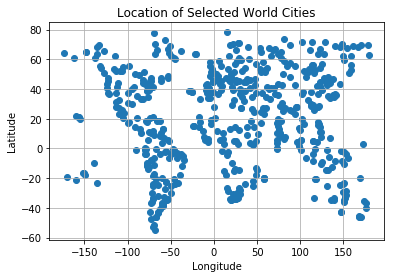

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Longitude"], weather_data["Latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Location of Selected World Cities")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)

# Save the figure
plt.savefig("LocationOfWorldCities.png")

# Show plot
plt.show()

##### Observation:  The scatter diagram above shows two weaknesses of the approach to chosing the cities.  
#####     1) First there is a greater density of cities on the coasts.  
#####     2) Second, the density of the cities appears as great at the 60th parallel as at the 20th parallel.  
##### Possible reasons:  
#####     1) Cities on ocean coasts are much more likely to be selected because any geocoordinates that are oceanic would produce the nearest #####         city which would be on a coast.  
#####     2) The method used to select cities ignores that the surface area of the earth decreases moving from the equator to the poles, 
#####         but because of this, cities toward the poles will have a higher likelihood of being selected.  
##### A sampling method based on a spherical earth would provide a more random sample.    

### Temperature (F) vs. Latitude Plot

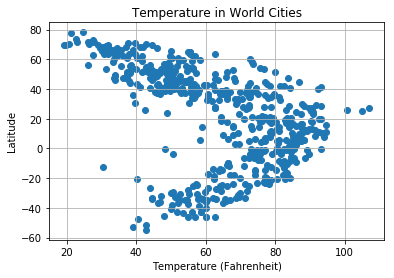

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Temperature (F)"], weather_data["Latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Latitude")
plt.xlabel("Temperature (Fahrenheit)")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

##### Observations for Temperature (F) vs. Latitude Plot
##### As espected there are higher temperatures nearer the equator, though even higher toward the 15th parallel where there are major deserts.  ##### That we are a little beyond the spring equinox may also help account for this trend.  
##### It looks as though the cities closer to the north pole are warmer than those toward the south, but that may be because there are so few
##### cities toward the South Pole, that there were none in the sample. 

### Humidity (%) vs. Latitude Plot

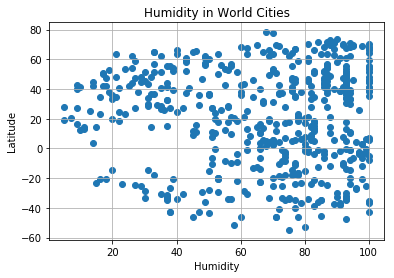

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Humidity"], weather_data["Latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

##### Observations for Humidity (%) vs. Latitude
##### For the data collection time humidity above 40% seems to be evenly distributed across latitudes.  
##### Many more of the selected citiies have humidity above than below 60%. 
##### Cities with less that 20% humidity seem to be concentrated around the 20th parallel, where the Sahara and Arabian Deserts are located. 

### Cloudiness (%) vs. Latitude Plot

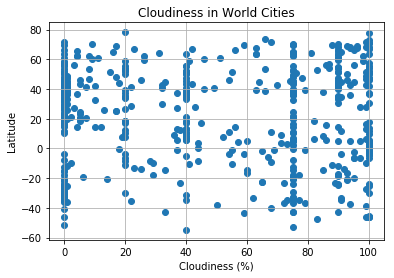

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Cloudiness"], weather_data["Latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

##### Observations: Cloudiness (%) vs. Latitude Plot
##### For the majority of cities, cloudiness must be estimated rather than being objectively measured.  When we estimate, we tend to round values to familiar markers like 0, 20%, 40%, 75%, 90%, which is reflected in the chart above.  

### Wind Speed (mph) vs. Latitude Plot

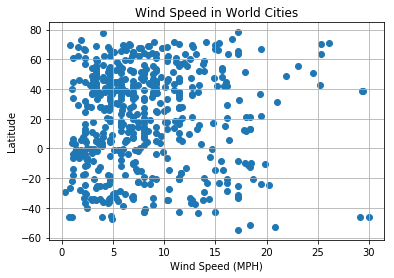

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Wind Speed (MPH)"], weather_data["Latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (MPH)")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

##### Observations for Wind Speed (mph) vs. Latitude
##### Windspeeds appear to be equally dispersed vertically (across lattitude).  Many fewer cities had windspeeds above 15 than below 15, and ##### there is a slight tendency for the areas closer to the poles to have the much higher windspeeds. 